In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [7]:
from tensorflow.keras.datasets import boston_housing

In [8]:
(X_train,y_train),(X_test,y_test)=boston_housing.load_data()

57026/57026 [==============================] - 0s 2us/step


In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

In [11]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
11/11 [==============================] - 2s 45ms/step - loss: 564.3831 - mae: 21.8752 - val_loss: 595.2294 - val_mae: 22.5856
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 501.9810 - mae: 20.3715 - val_loss: 531.5349 - val_mae: 21.1209
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 436.2554 - mae: 18.6936 - val_loss: 452.1558 - val_mae: 19.2402
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 353.8048 - mae: 16.5033 - val_loss: 353.4619 - val_mae: 16.6305
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 257.4964 - mae: 13.7128 - val_loss: 242.2316 - val_mae: 13.2888
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 159.1944 - mae: 10.3124 - val_loss: 141.3153 - val_mae: 9.3764
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 90.2177 - mae: 7.3734 - val_loss: 84.0893 - val_mae: 6.8590
Epoch 8/100
11/11 [==========================

11/11 [==============================] - 0s 3ms/step - loss: 8.5013 - mae: 2.0618 - val_loss: 13.1187 - val_mae: 2.5802
Epoch 63/100
11/11 [==============================] - 0s 3ms/step - loss: 8.2850 - mae: 2.0380 - val_loss: 13.5282 - val_mae: 2.6139
Epoch 64/100
11/11 [==============================] - 0s 3ms/step - loss: 8.3610 - mae: 2.0736 - val_loss: 13.3202 - val_mae: 2.5724
Epoch 65/100
11/11 [==============================] - 0s 3ms/step - loss: 8.2197 - mae: 2.0153 - val_loss: 12.1593 - val_mae: 2.6021
Epoch 66/100
11/11 [==============================] - 0s 3ms/step - loss: 8.2977 - mae: 2.0088 - val_loss: 12.3055 - val_mae: 2.5447
Epoch 67/100
11/11 [==============================] - 0s 3ms/step - loss: 8.2150 - mae: 2.0315 - val_loss: 12.7828 - val_mae: 2.5533
Epoch 68/100
11/11 [==============================] - 0s 3ms/step - loss: 8.0716 - mae: 1.9968 - val_loss: 12.4553 - val_mae: 2.5122
Epoch 69/100
11/11 [==============================] - 0s 3ms/step - loss: 8.0982 -

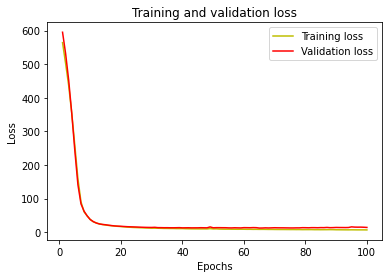

In [14]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 2ms/step - loss: 24.7137 - mae: 3.0062
Mean squared error from neural net:  24.713743209838867
Mean absolute error from neural net:  3.0062358379364014


In [16]:
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 116ms/step
Predicted values are:  [[ 7.838162]
 [18.776817]
 [21.297974]
 [32.4009  ]
 [25.060867]]
Real values are:  [ 7.2 18.8 19.  27.  22.2]


In [17]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  23.195599256422977
Mean absolute error from linear regression:  3.4641858124067166
